Stroke Prediction -
Stroke is a severe medical condition caused by a disruption in blood supply to the brain, resulting from either a blockage or the rupture of a blood vessel. Prompt medical attention is crucial in such cases. Numerous factors contribute to an increased risk of stroke, making it essential to explore the relationships between these factors and the occurrence of stroke. Analyzing a dataset containing information such as age, gender, hypertension, heart disease, average glucose level, smoking status, and BMI enables the training of machine learning models. These models can identify patterns and make predictions about an individual's likelihood of experiencing a stroke. Integrating such predictive models into healthcare systems allows medical professionals to proactively identify individuals at higher risk of stroke, enabling preventive measures and better management of the condition. This approach has the potential to save lives and enhance patient outcomes.

Goal here is to classify whether a person has a stroke or not. That is, it is a classification problem.

The information about dataset:

- id: unique identifier

- gender: "Male", "Female" or "Other"

- age: age of the patient

- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

- ever_married: "No" or "Yes"

- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

- Residence_type: "Rural" or "Urban"

- avg_glucose_level: average glucose level in blood

- bmi: body mass index

- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

- stroke: 1 if the patient had a stroke or 0 if not

#### Importing the libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Loading the Stroke Prediction Dataset

In [15]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/DSMT/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Knowing the categorical and numerical columns

In [3]:
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(exclude=['object']).columns

print("Categorical: ",categorical_columns)
print("Categorical Column Count:", len(categorical_columns))

print("\nNumeric",numeric_columns)
print("Numeric Column Count:", len(numeric_columns))

Categorical:  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Categorical Column Count: 5

Numeric Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Numeric Column Count: 7


In [4]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### What are the datatypes?
In this dataset has 5 categorical columns and 7 numerical columns

### Are there any missing values?
Yes, bmi column has 201 null values. The graph below tells that the bmi has right-skewed distribution. Therefore using median to impute the missing values later.

### Which independent variables have missing data? How much?
Here, the target variable is "stroke" and all other are the independent variables.
Therefore, "bmi" is one of the independent variables that has 201 null values

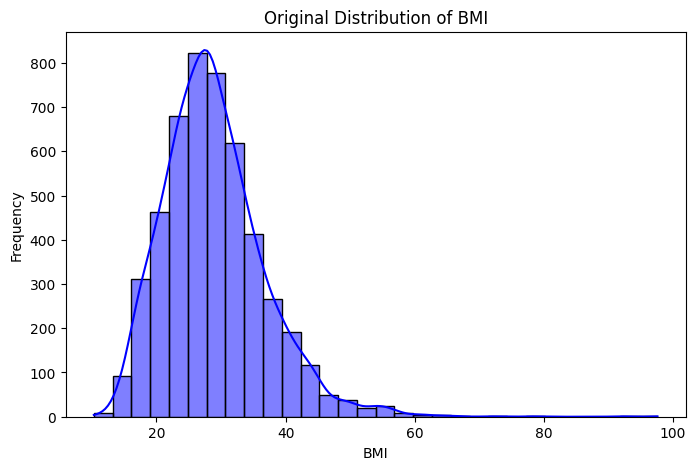

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(data['bmi'], kde=True, bins=30, color='blue') # taking the bmi column since it has null values to see its destributions
plt.title('Original Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### Preprocessing

In [16]:
# dropping the id column
data.drop('id' , axis = 1 , inplace = True)

#filling the null values by median
data.bmi.fillna(data.bmi.median(),inplace=True)
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Exploratory Data Analysis (EDA)

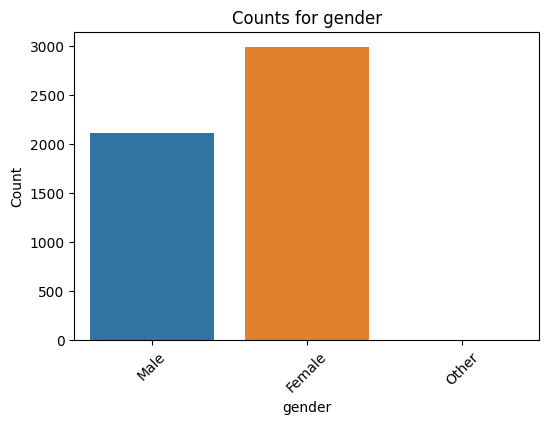

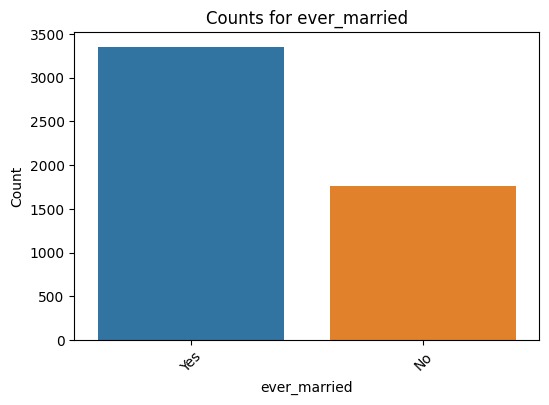

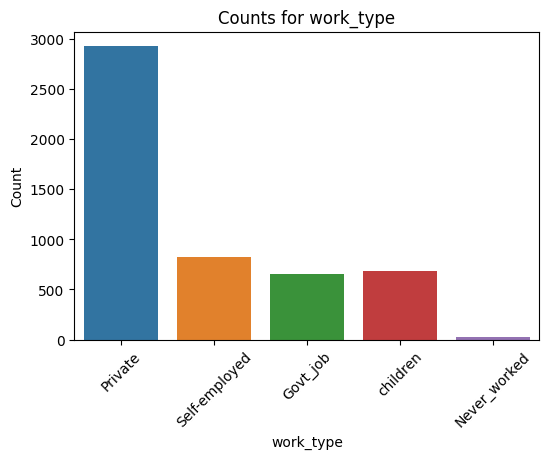

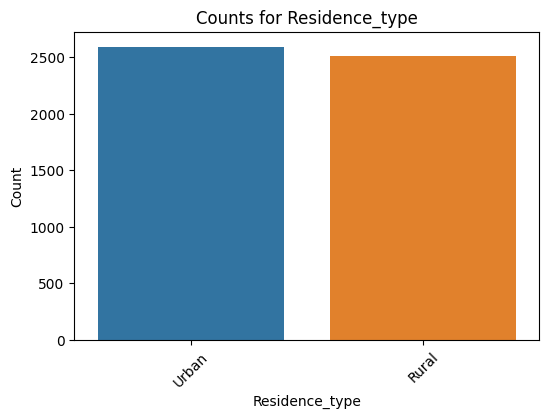

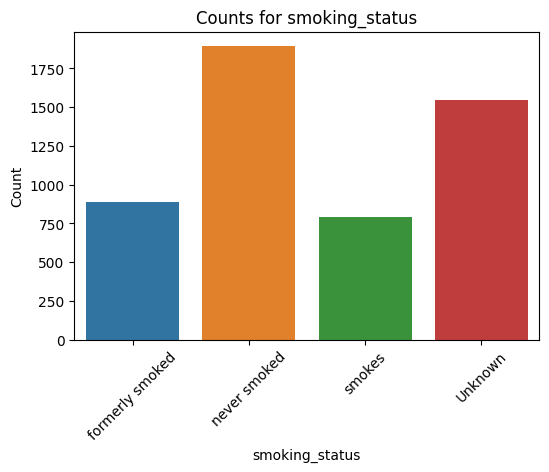

In [14]:
# List of categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Loop through each categorical column
for column in categorical_columns:
    # Create a new figure for each column
    plt.figure(figsize=(6, 4))

    # Plot the count for the current column
    sns.countplot(x=data[column], hue= data[column])

    # Set labels and title
    plt.title(f"Counts for {column}")
    plt.ylabel("Count")
    plt.xlabel(column)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

##### This helps to tell us the unique values and the counts for each categorical columns

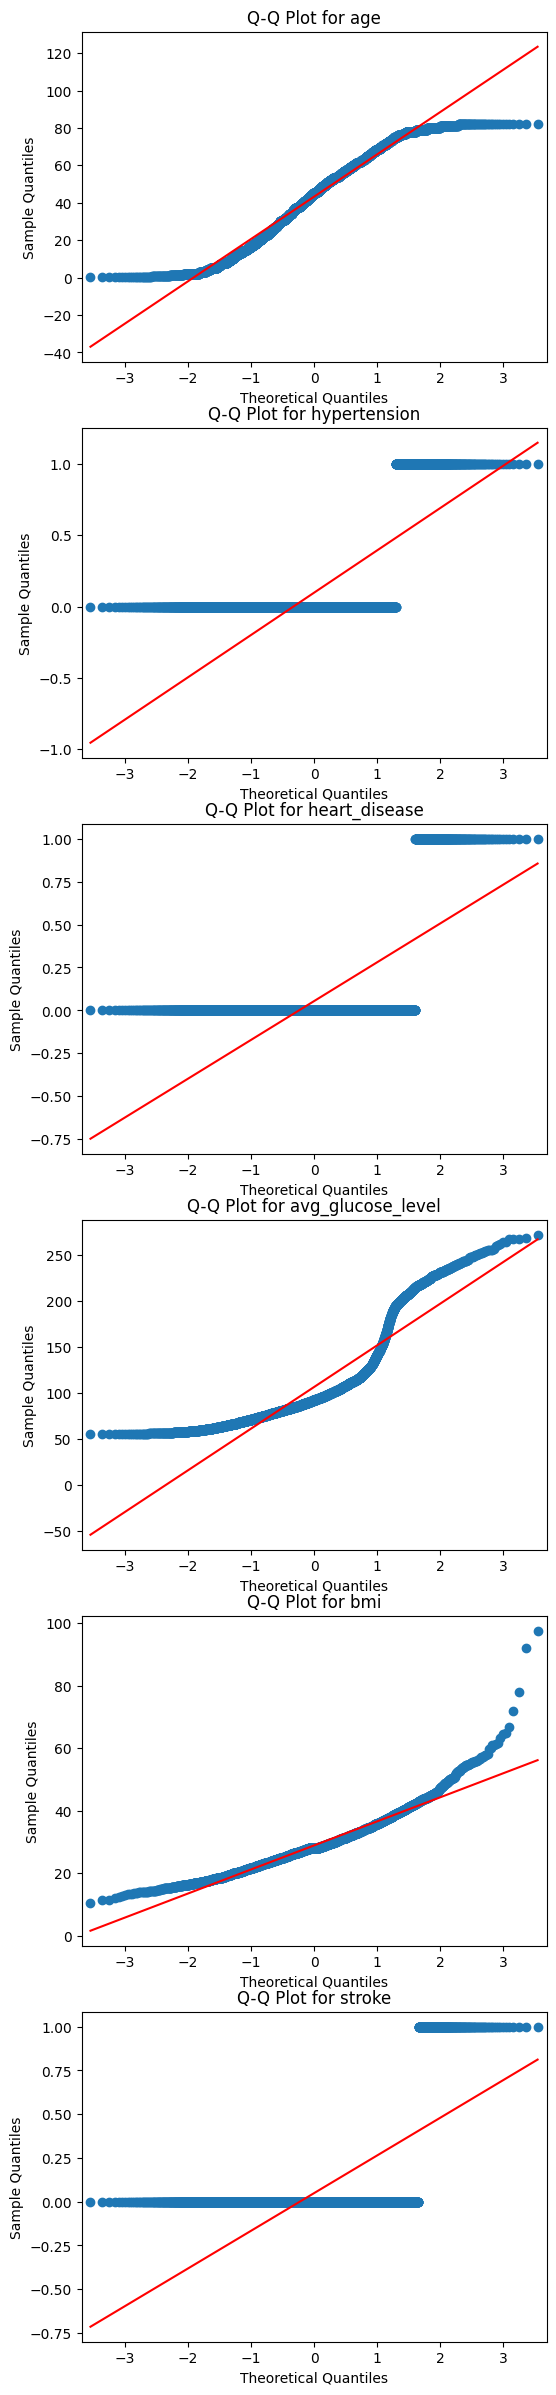

In [17]:
numeric_columns_list = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'] # creating a list

fig, axes = plt.subplots(nrows=len(numeric_columns_list), figsize=(6, 5 * len(numeric_columns_list)))

# Plot Q-Q plots for each numeric variable
for i, variable in enumerate(numeric_columns_list):
    sm.qqplot(data[variable], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot for {variable}')

plt.show()

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

### Likely Distributions of independent and dependent variables which include numerical and categorical columns both

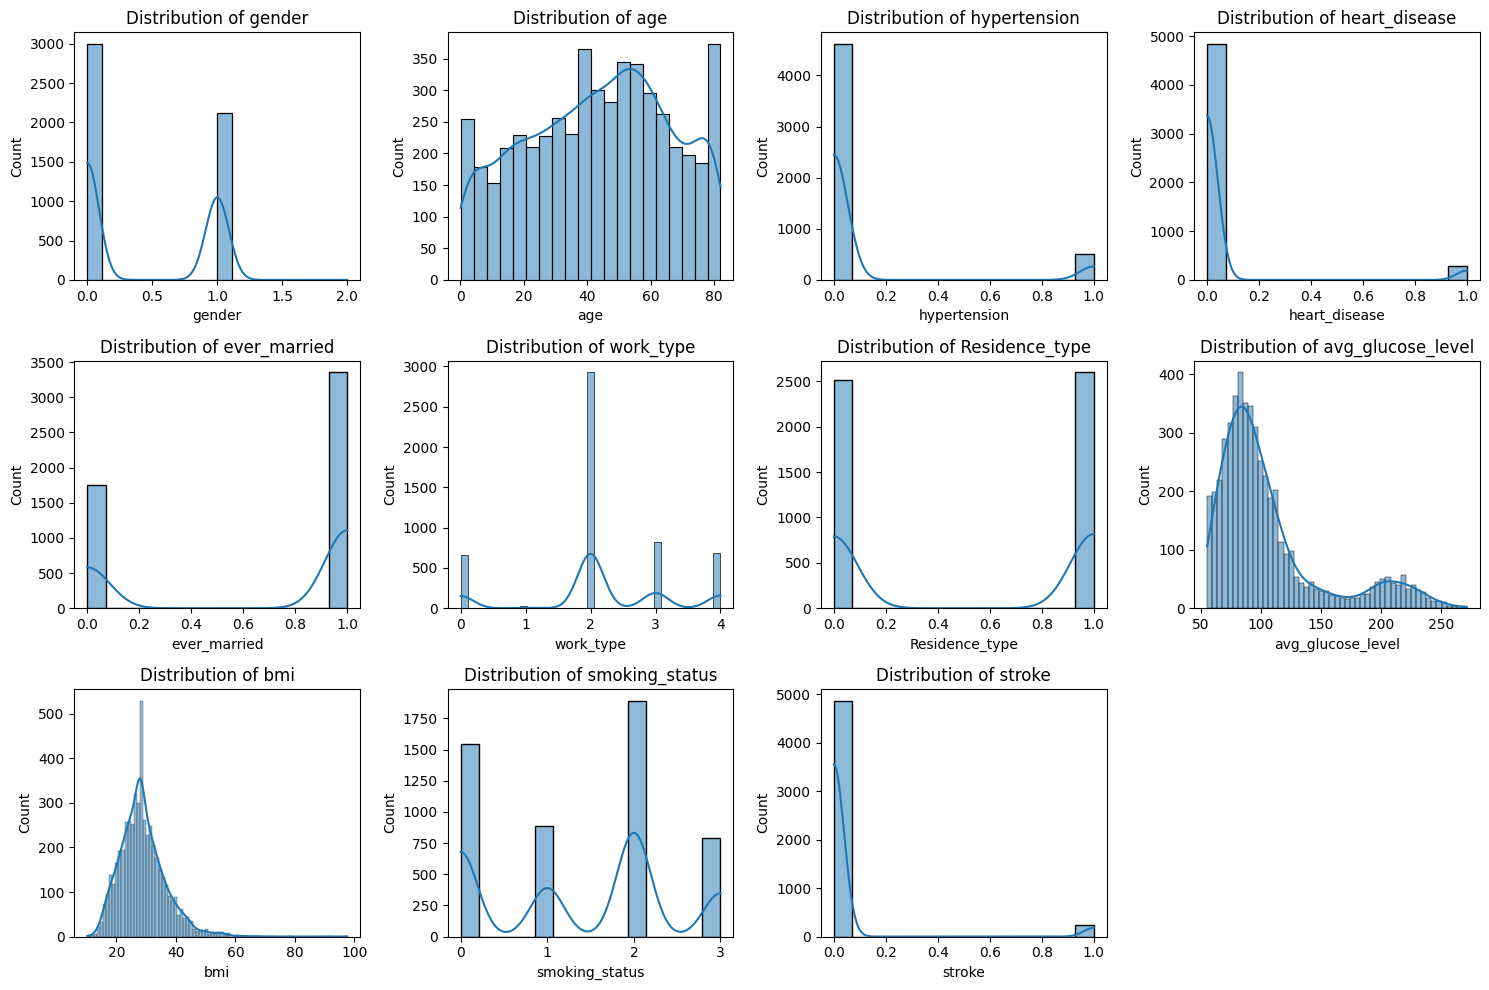

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Likely Distributions of all the features including independent and dependedent variables.

In [21]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.862035,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.699562,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


#### Do the ranges of the predictor variables(independent variables) make sense?
- In the age column, the range is 0.08 to 82 and the mean age being 43.22. Here the min age can be a data entry issue or can be related to infants. The range of all the other variables make sense.
- For example -
- Gender ranges from 0 to 2, that is male, female, and other
Ever Married ranges from 0 to 1, that is yes or no. Same goes with hypertension, heart disease, and stroke.
- Smoking Status ranges from 0 to 3. These include formerly smoked, never smoked, smokes and unknown.
- Residence type ranges from 0 to 1 that is rural  or urban.
Work Type ranges from 0 to 4. These include Private, self employed, Govt job, Children, and never worked.


### Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

#### 1. Using Heatmaps

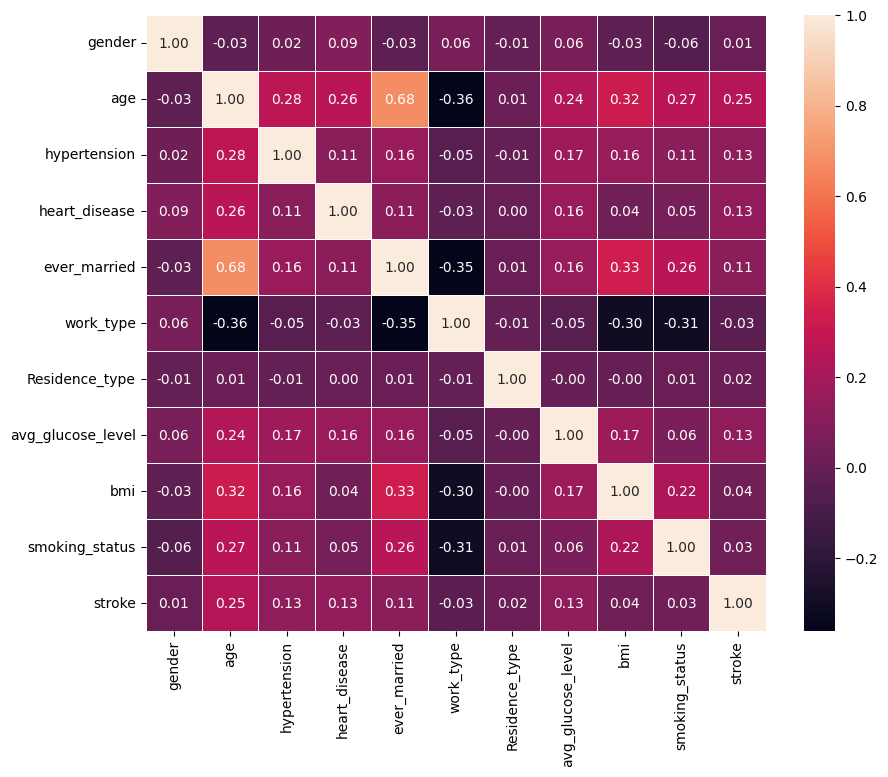

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.2f')
plt.show()

#### In the predictor variables(independent variables) independent of all the other predictor variables(independent variables)?
From the predictor variables, according to the heatmap, age and ever_married have a positive correlation

#### 2. Random Forest Classifier

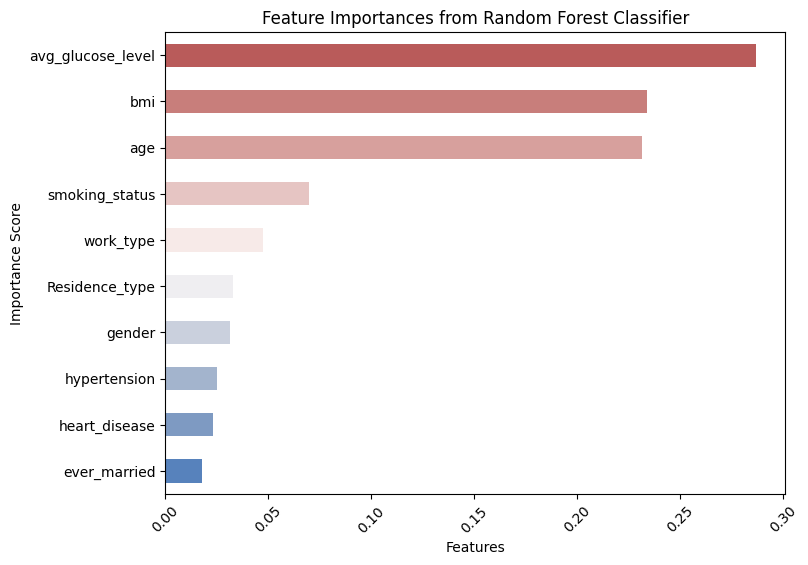

In [23]:
X2 = data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
          'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y2 = data['stroke']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X2, y2)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X2.columns).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
colors = sns.color_palette("vlag", len(feature_importances))
feature_importances.plot(kind='barh', color=colors)
plt.title('Feature Importances from Random Forest Classifier')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

#### Which predictor variables are the most important?

According to Random Forest Classifier, avg_glucose_level is the most important feature, followed by bmi and then age. The least important feature is ever_married.

#### 3. RFE Ranking with logistic regression model

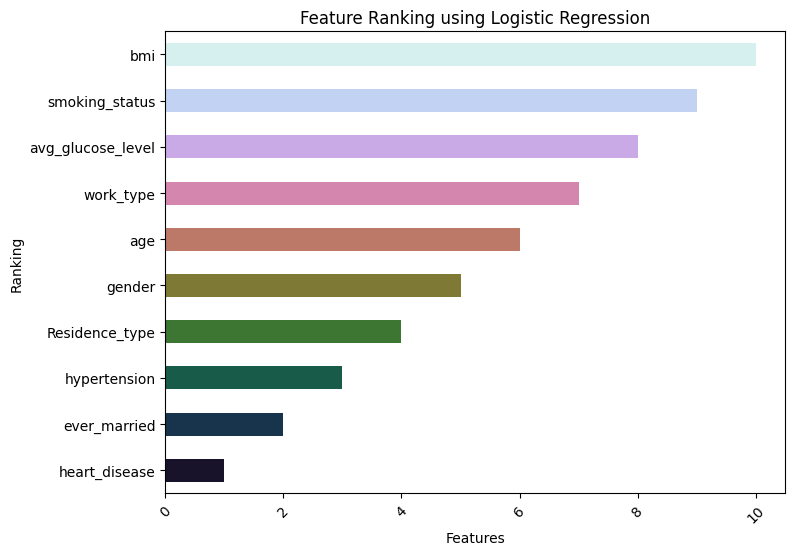

In [24]:
logreg_model = LogisticRegression(max_iter=1000)

# Initialize RFE with the Logistic Regression model
rfe = RFE(logreg_model, n_features_to_select=1)

# Fit RFE
rfe.fit(X2, y2)

# Get ranking of features
feature_ranking = pd.Series(rfe.ranking_, index=X2.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
colors = sns.color_palette("cubehelix", len(feature_ranking))
feature_ranking.plot(kind='barh', color=colors)
plt.title('Feature Ranking using Logistic Regression')
plt.ylabel('Ranking')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

According to RFE Ranking method, the most important feature is bmi, followed by smoking status, and then avg_glucose_level. The feature with least importance is heart_disease

#### 4. OLS Regression Method

In [25]:
model = sm.OLS(data['stroke'], data[['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status',
                                   'age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 stroke   R-squared (uncentered):                   0.124
Model:                            OLS   Adj. R-squared (uncentered):              0.122
Method:                 Least Squares   F-statistic:                              71.91
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                   3.41e-138
Time:                        02:30:11   Log-Likelihood:                          806.20
No. Observations:                5110   AIC:                                     -1592.
Df Residuals:                    5100   BIC:                                     -1527.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender               -0.0029      0.006     -0.491      0.624      -0.014       0.009
ever_married         -0.0361      0.009     -4.230      0.000      -0.053      -0.019
work_type            -0.0010      0.002     -0.436      0.663      -0.006       0.004
Residence_type        0.0017      0.006      0.302      0.763      -0.009       0.013
smoking_status       -0.0066      0.003     -2.305      0.021      -0.012      -0.001
age                   0.0025      0.000     13.618      0.000       0.002       0.003
hypertension          0.0461      0.010      4.540      0.000       0.026       0.066
heart_disease         0.0579      0.013      4.313      0.000       0.032       0.084
avg_glucose_level     0.0003   6.49e-05      3.931      0.000       0.000       0.000
bmi                  -0.0020      0.000     -6.237      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     3861.503   Durbin-Watson:                   0.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49740.001
Skew:                           3.715   Prob(JB):                         0.00
Kurtosis:                      16.357   Cond. No.                         587.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to OLS regression method - Ever Married, smoking status, age, hypertension, heart disease, avg glucose level, and bmi are important factors

## Model Training

In [26]:
X = data.drop("stroke",axis=1)
y =data['stroke']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

#### Do the training and test sets have the same data?
Training and tests data have different data

In [27]:
data_equals = X_train.equals(X_test)
if data_equals:
  print('Training and test data have same data')
else:
  print('Training and test data have different data')

Training and test data have different data


###  Logistic Regression - 94.19

In [28]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

Logistic Regression Accuracy: 0.9419


Confusion Matrix for Logistic Regression

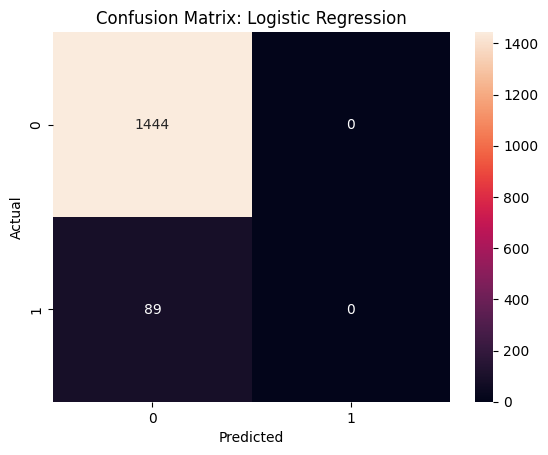

In [29]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Logistic Regression -
- True Positive - 1444
- True Negative - 0
- False Positive - 89
- False Negative - 0

Cassification Report for logistic Regression

In [30]:
# Classification Report Logistic Regression
classification_rep_logreg = classification_report(y_test, y_pred_logreg, zero_division=1)

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_rep_logreg)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.97      0.50      0.49      1533
weighted avg       0.95      0.94      0.91      1533



### 2. SVM - 94.19

In [31]:
# SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Accuracy and Confusion Matrix
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.9419


Confusion Matrix for SVM

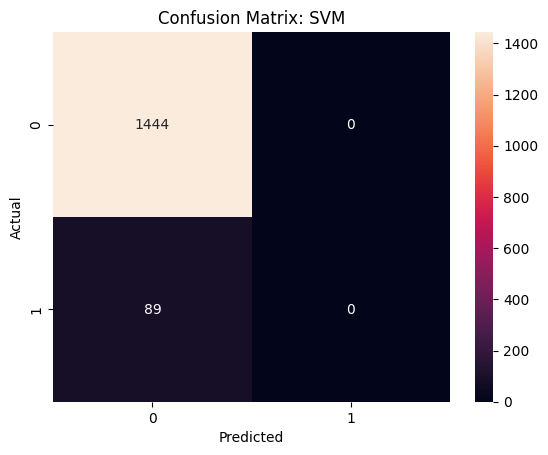

In [32]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d")
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 3. Decision Tree Classifier - 90.80

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.9080


In [35]:
# Classification Report Decision Tree
classification_rep_dt = classification_report(y_test, y_pred_dt, zero_division=1)

# Print the classification report
print("Classification Report for Decision Tree:")
print(classification_rep_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.19      0.18      0.18        89

    accuracy                           0.91      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.91      0.91      0.91      1533



## Handling Outliers

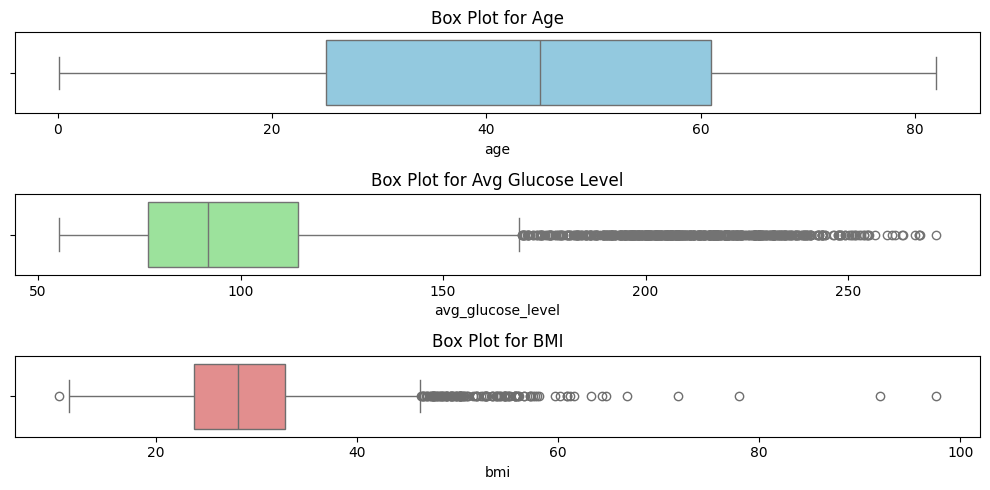

In [36]:
# Box plot
plt.figure(figsize=(10, 5))

# Box plot for 'age'
plt.subplot(3, 1, 1)
sns.boxplot(x=data['age'], color='skyblue')
plt.title('Box Plot for Age')

# Box plot for 'avg_glucose_level'
plt.subplot(3, 1, 2)
sns.boxplot(x=data['avg_glucose_level'], color='lightgreen')
plt.title('Box Plot for Avg Glucose Level')

# Box plot for 'bmi'
plt.subplot(3, 1, 3)
sns.boxplot(x=data['bmi'], color='lightcoral')
plt.title('Box Plot for BMI')

# Adjust layout
plt.tight_layout()
plt.show()

#### Outliers for BMI

In [37]:
# Identifying outliers using IQR method for 'bmi'
Q1_bmi = data['bmi'].quantile(0.25)
Q3_bmi = data['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Finding outliers in 'bmi'
outliers_bmi = data[(data['bmi'] < lower_bound_bmi) | (data['bmi'] > upper_bound_bmi)]

# Removing 'bmi' outliers
stroke_data_no_outliers_bmi = data.drop(outliers_bmi.index)

# Store the lower bound, upper bound, and number of outliers removed for 'bmi'
threshold_comparison_bmi = pd.DataFrame({
    'Column': ['bmi'],
    'Lower Bound': [lower_bound_bmi],
    'Upper Bound': [upper_bound_bmi],
    'Outliers Removed': [len(outliers_bmi)]
})
print(threshold_comparison_bmi)

  Column  Lower Bound  Upper Bound  Outliers Removed
0    bmi         10.3         46.3               126


In [38]:
X_outlier_bmi = stroke_data_no_outliers_bmi.drop('stroke', axis=1)
y_outlier_bmi = stroke_data_no_outliers_bmi['stroke']

In [39]:
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(X_outlier_bmi, y_outlier_bmi, test_size=0.3, random_state=42)

#### Logistic Regression Model - without bmi oulier (94.32)

In [40]:
logreg_model_without_bmi = LogisticRegression(max_iter=1000)
logreg_model_without_bmi.fit(X_train_bmi, y_train_bmi)

y_pred_logreg_without_bmi = logreg_model_without_bmi.predict(X_test_bmi)

# Accuracy
accuracy_logreg_without_bmi = accuracy_score(y_test_bmi, y_pred_logreg_without_bmi)
print(f"Logistic Regression Accuracy without bmi's outlier: {accuracy_logreg_without_bmi:.4f}")

Logistic Regression Accuracy without bmi's outlier: 0.9432


#### Decision Tree - without bmi outlier (91.84)

In [41]:
# decision tree classifier
dtwithout_Outlier_bmi = DecisionTreeClassifier()
dtwithout_Outlier_bmi.fit(X_train_bmi, y_train_bmi)
y_pred_dt_without_Outlier_bmi = dtwithout_Outlier_bmi.predict(X_test_bmi)

#calculating the accuracy score
accuracy_dt_without_Outlier_bmi = accuracy_score(y_test_bmi, y_pred_dt_without_Outlier_bmi)
print(f"Decision Tree Accuracy without outliers: {accuracy_dt_without_Outlier_bmi:.4f}")

Decision Tree Accuracy without outliers: 0.9184


#### Outliers for avg_glucose_level

In [42]:
# Identifying outliers using IQR method for 'avg_glucose_level'
Q1_glucose = data['avg_glucose_level'].quantile(0.25)
Q3_glucose = data['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose

# Finding outliers in 'avg_glucose_level'
outliers_glucose = data[(data['avg_glucose_level'] < lower_bound_glucose) | (data['avg_glucose_level'] > upper_bound_glucose)]

# Removing 'bmi' outliers
stroke_data_no_outliers_glucose = data.drop(outliers_glucose.index)

# Store the lower bound, upper bound, and number of outliers removed for 'avg_glucose_level'
threshold_comparison_glucose = pd.DataFrame({
    'Column': ['avg_glucose_level'],
    'Lower Bound': [lower_bound_glucose],
    'Upper Bound': [upper_bound_glucose],
    'Outliers Removed': [len(outliers_glucose)]
})
print(threshold_comparison_glucose)

              Column  Lower Bound  Upper Bound  Outliers Removed
0  avg_glucose_level      21.9775     169.3575               627


In [43]:
X_outlier_glucose = stroke_data_no_outliers_glucose.drop('stroke', axis=1)
y_outlier_glucose = stroke_data_no_outliers_glucose['stroke']

In [44]:
X_train_glucose, X_test_glucose, y_train_glucose, y_test_glucose = train_test_split(X_outlier_glucose, y_outlier_glucose, test_size=0.3, random_state=42)

#### Logistic Regression without avg_glucose_level outliers (96.21)

In [45]:
#Logistic regression model
logreg_model_without_glucose = LogisticRegression(max_iter=1000)
logreg_model_without_glucose.fit(X_train_glucose, y_train_glucose)

y_pred_logreg_without_glucose = logreg_model_without_glucose.predict(X_test_glucose)

# Accuracy
accuracy_logreg_without_glucose = accuracy_score(y_test_glucose, y_pred_logreg_without_glucose)
print(f"Logistic Regression Accuracy without avg_glucose_level outlier: {accuracy_logreg_without_glucose:.4f}")

Logistic Regression Accuracy without avg_glucose_level outlier: 0.9621


#### Decision Tree without avg_glucoe_level outlier (92.86)

In [46]:
dtwithout_Outlier_glucose = DecisionTreeClassifier()
dtwithout_Outlier_glucose.fit(X_train_glucose, y_train_glucose)
y_pred_dt_without_Outlier_g = dtwithout_Outlier_glucose.predict(X_test_glucose)

accuracy_dt_without_Outlier_glucose = accuracy_score(y_test_glucose, y_pred_dt_without_Outlier_g)
print(f"Decision Tree Accuracy without avg_glucose_level outliers: {accuracy_dt_without_Outlier_glucose:.4f}")

Decision Tree Accuracy without avg_glucose_level outliers: 0.9286


If both the outliers are removed together

In [47]:
original_data = data.copy()

# Selecting numerical columns for outlier detection
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Collecting indices of all outliers
outlier_indices = set()

# Create a DataFrame to store the count of non-null values and outlier thresholds
threshold_comparison = pd.DataFrame(columns=['Column', 'Lower Bound', 'Upper Bound', 'Outliers Removed'])

In [48]:
# Identifying outliers using IQR method
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Finding outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_removed = len(outliers)
    outlier_indices.update(outliers.index)

    # Create a new row for this column
    new_row = pd.DataFrame({
        'Column': [col],
        'Lower Bound': [lower_bound],
        'Upper Bound': [upper_bound],
        'Outliers Removed': [outliers_removed]
    })

    # Append the new row to the threshold_comparison DataFrame
    threshold_comparison = pd.concat([threshold_comparison, new_row], ignore_index=True)

# Print the threshold comparison
print(threshold_comparison)

# Removing all outliers at once
stroke_data_no_outliers = data.drop(index=outlier_indices)

              Column  Lower Bound  Upper Bound Outliers Removed
0                age     -29.0000     115.0000                0
1  avg_glucose_level      21.9775     169.3575              627
2                bmi      10.3000      46.3000              126


In [49]:
X_outlier = stroke_data_no_outliers.drop('stroke', axis=1)
y_outlier = stroke_data_no_outliers['stroke']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_outlier, y_outlier, test_size=0.3, random_state=42)

Logistic Regression without both the outliers - (96.05)

In [51]:
logreg_model_without_Outlier = LogisticRegression(max_iter=1000)
logreg_model_without_Outlier.fit(X_train, y_train)

y_pred_logreg_without_Outlier = logreg_model_without_Outlier.predict(X_test)

# Accuracy
accuracy_logreg_without_outlier = accuracy_score(y_test, y_pred_logreg_without_Outlier)
print(f"Logistic Regression Accuracy: {accuracy_logreg_without_outlier:.4f}")

Logistic Regression Accuracy: 0.9605


Decision Tree without both the outliers (92.11)

In [53]:
dtwithout_Outlier = DecisionTreeClassifier()
dtwithout_Outlier.fit(X_train, y_train)
y_pred_dt_without_Outlier = dtwithout_Outlier.predict(X_test)

accuracy_dt_without_Outlier = accuracy_score(y_test, y_pred_dt_without_Outlier)
print(f"Decision Tree Accuracy without outliers: {accuracy_dt_without_Outlier:.4f}")

Decision Tree Accuracy without outliers: 0.9211


From here we can conclude that accuracy is maximum in both the models only when outliers from avg_glucose_level is removed

### Removing some amount of data

#### 1%

In [54]:
data_1 = data.copy()

#removing 1% data from column
data_percent=data_1['age'].sample(frac = 0.01)

#using location of fraction data to set null
data_1['age'].loc[data_1.index.isin(data_percent.index)]=np.NaN

<ipython-input-54-c0bac72f4505>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['age'].loc[data_1.index.isin(data_percent.index)]=np.NaN


In [55]:
data_1.isnull().sum()

gender                0
age                  51
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                   0
smoking_status        0
stroke                0
dtype: int64

### 1% by mean

In [56]:
data_1['age']=data_1['age'].fillna(data_1['age'].mean())

#### Decision Tree model (mean-1%)

In [57]:
X_1 = data_1.drop('stroke', axis=1)
y_1 = data_1['stroke']

#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

dt1_mean = DecisionTreeClassifier()
dt1_mean.fit(X_train1, y_train1)
y_pred1_mean = dt1_mean.predict(X_test1)

accuracy_dt1_mean = accuracy_score(y_test1, y_pred1_mean)
print(f"Decision Tree Accuracy: {accuracy_dt1_mean:.4f}")

Decision Tree Accuracy: 0.9119


In [58]:
classification_rep_dt_mean = classification_report(y_test1, y_pred1_mean, zero_division=1)
print(classification_rep_dt_mean)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.24      0.24      0.24        89

    accuracy                           0.91      1533
   macro avg       0.60      0.59      0.60      1533
weighted avg       0.91      0.91      0.91      1533



#### 1% by median

In [59]:
data_1_median = data.copy()

#removing 1% data from column
data_percent_median=data_1_median['age'].sample(frac = 0.01)

#using location of fraction data to set null
data_1_median['age'].loc[data_1_median.index.isin(data_percent_median.index)]=np.NaN

<ipython-input-59-888693b6bb5a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_median['age'].loc[data_1_median.index.isin(data_percent_median.index)]=np.NaN


In [60]:
data_1_median['age']=data_1_median['age'].fillna(data_1_median['age'].median())

In [61]:
X_1_median = data_1_median.drop('stroke', axis=1)
y_1_median = data_1_median['stroke']

# train test split
X_train1_median, X_test1_median, y_train1_median, y_test1_median = train_test_split(X_1_median, y_1_median, test_size=0.3, random_state=42)

# decision tree

dt1_median = DecisionTreeClassifier()
dt1_median.fit(X_train1_median, y_train1_median)
y_pred1_median = dt1_median.predict(X_test1_median)

# accuracy score
accuracy_dt1_median = accuracy_score(y_test1_median, y_pred1_median)
print(f"Decision Tree Accuracy: {accuracy_dt1_median:.4f}")

Decision Tree Accuracy: 0.9113


In [62]:
classification_rep_dt_median = classification_report(y_test1_median, y_pred1_median, zero_division=1)
print(classification_rep_dt_median)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1444
           1       0.17      0.13      0.15        89

    accuracy                           0.91      1533
   macro avg       0.56      0.55      0.55      1533
weighted avg       0.90      0.91      0.91      1533



1% by mode

In [69]:
data_1_mode = data.copy()

#removing 1% data from column
data_percent_mode=data_1_mode['age'].sample(frac = 0.01)

#using location of fraction data to set null
data_1_mode['age'].loc[data_1_mode.index.isin(data_percent_mode.index)]=np.NaN


<ipython-input-69-3d134179926d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_mode['age'].loc[data_1_mode.index.isin(data_percent_mode.index)]=np.NaN


In [70]:
data_1_mode['age'] = data_1_mode['age'].fillna(data_1_mode['age'].mode().iloc[0])

In [71]:
X_1_mode = data_1_mode.drop('stroke', axis=1)
y_1_mode = data_1_mode['stroke']

X_train1_mode, X_test1_mode, y_train1_mode, y_test1_mode = train_test_split(X_1_mode, y_1_mode, test_size=0.3, random_state=42)

dt1_mode = DecisionTreeClassifier()
dt1_mode.fit(X_train1_mode, y_train1_mode)
y_pred1_mode = dt1_mode.predict(X_test1_mode)

accuracy_dt1_mode = accuracy_score(y_test1_mode, y_pred1_mode)
print(f"Decision Tree Accuracy: {accuracy_dt1_mode:.4f}")

Decision Tree Accuracy: 0.9165


In [72]:
classification_rep_dt_mode = classification_report(y_test1_mode, y_pred1_mode, zero_division=1)
print(classification_rep_dt_mode)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1444
           1       0.23      0.18      0.20        89

    accuracy                           0.92      1533
   macro avg       0.59      0.57      0.58      1533
weighted avg       0.91      0.92      0.91      1533



### Removing 5% of the data (mean)

In [73]:
data_5 = data.copy()

#removing 5% data from column
data_percent_5=data_5['age'].sample(frac = 0.05)

#using location of fraction data to set null
data_5['age'].loc[data_5.index.isin(data_percent_5.index)]=np.NaN

<ipython-input-73-60aee39c291f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5['age'].loc[data_5.index.isin(data_percent_5.index)]=np.NaN


In [74]:
data_5.isnull().sum()

gender                 0
age                  256
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status         0
stroke                 0
dtype: int64

In [75]:
data_5['age']=data_5['age'].fillna(data_5['age'].mean())

In [77]:
X5_mean = data_5.drop('stroke', axis=1)
y5_mean = data_5['stroke']

X_train5_mean, X_test5_mean, y_train5_mean, y_test5_mean = train_test_split(X5_mean, y5_mean, test_size=0.3, random_state=42)

dt5_mean = DecisionTreeClassifier()
dt5_mean.fit(X_train5_mean, y_train5_mean)
y_pred5_mean = dt5_mean.predict(X_test5_mean)

accuracy_dt5_mean = accuracy_score(y_test5_mean, y_pred5_mean)
print(f"Decision Tree Accuracy: {accuracy_dt5_mean:.4f}")

Decision Tree Accuracy: 0.9035


In [78]:
classification_rep_dt_mean = classification_report(y_test5_mean, y_pred5_mean, zero_division=1)
print(classification_rep_dt_mean)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.16      0.16      0.16        89

    accuracy                           0.90      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.90      0.90      0.90      1533



### 5% of the data using median

In [79]:
data_5_median = data.copy()

#removing 1% data from column
data5_percent_median=data_5_median['age'].sample(frac = 0.05)

#using location of fraction data to set null
data_5_median['age'].loc[data_5_median.index.isin(data5_percent_median.index)]=np.NaN

<ipython-input-79-5874c6fcaee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5_median['age'].loc[data_5_median.index.isin(data5_percent_median.index)]=np.NaN


In [80]:
data_5_median['age']=data_5_median['age'].fillna(data_5_median['age'].mean())

In [82]:
X5_median = data_5_median.drop('stroke', axis=1)
y5_median = data_5_median['stroke']

X_train5_median, X_test5_median, y_train5_median, y_test5_median = train_test_split(X5_median, y5_median, test_size=0.3, random_state=42)

dt5_median = DecisionTreeClassifier()
dt5_median.fit(X_train5_median, y_train5_median)
y_pred5_median = dt5_median.predict(X_test5_mean)

accuracy_dt5_median = accuracy_score(y_test5_median, y_pred5_median)
print(f"Decision Tree Accuracy: {accuracy_dt5_median:.4f}")

Decision Tree Accuracy: 0.8969


In [83]:
classification_rep5_dt_median = classification_report(y_test5_median, y_pred5_median, zero_division=1)
print(classification_rep5_dt_median)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1444
           1       0.12      0.12      0.12        89

    accuracy                           0.90      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.90      0.90      0.90      1533



### Mode by 5%

In [84]:
data_5_mode = data.copy()

#removing 1% data from column
data5_percent_mode=data_5_mode['age'].sample(frac = 0.05)

#using location of fraction data to set null
data_5_mode['age'].loc[data_5_mode.index.isin(data5_percent_mode.index)]=np.NaN

<ipython-input-84-3541791ff7cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5_mode['age'].loc[data_5_mode.index.isin(data5_percent_mode.index)]=np.NaN


In [85]:
data_5_mode['age'] = data_5_mode['age'].fillna(data_5_mode['age'].mode().iloc[0])

In [86]:
X_5_mode = data_5_mode.drop('stroke', axis=1)
y_5_mode = data_5_mode['stroke']

X_train5_mode, X_test5_mode, y_train5_mode, y_test5_mode = train_test_split(X_5_mode, y_5_mode, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
dt5_mode = DecisionTreeClassifier()
dt5_mode.fit(X_train5_mode, y_train5_mode)
y_pred5_mode = dt5_mode.predict(X_test5_mode)

accuracy_dt5_mode = accuracy_score(y_test5_mode, y_pred5_mode)
print(f"Decision Tree Accuracy: {accuracy_dt5_mode:.4f}")

Decision Tree Accuracy: 0.9087


In [87]:
classification_rep5_dt_mode = classification_report(y_test5_mode, y_pred5_mode, zero_division=1)
print(classification_rep5_dt_mode)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1444
           1       0.15      0.12      0.14        89

    accuracy                           0.91      1533
   macro avg       0.55      0.54      0.54      1533
weighted avg       0.90      0.91      0.90      1533



### Removing 10% of the data (mean)

In [88]:
data_10 = data.copy()

#removing 5% data from column
data_percent_10=data_10['age'].sample(frac = 0.1)

#using location of fraction data to set null
data_10['age'].loc[data_10.index.isin(data_percent_10.index)]=np.NaN

<ipython-input-88-08aad3563025>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_10['age'].loc[data_10.index.isin(data_percent_10.index)]=np.NaN


In [106]:
data_10.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [90]:
data_10['age']=data_10['age'].fillna(data_10['age'].mean())

In [91]:
X10_mean = data_10.drop('stroke', axis=1)
y10_mean = data_10['stroke']

X_train10_mean, X_test10_mean, y_train10_mean, y_test10_mean = train_test_split(X10_mean, y10_mean, test_size=0.3, random_state=42)

dt10_mean = DecisionTreeClassifier()
dt10_mean.fit(X_train10_mean, y_train10_mean)
y_pred10_mean = dt5_mean.predict(X_test5_mean)

accuracy_dt10_mean = accuracy_score(y_test10_mean, y_pred10_mean)
print(f"Decision Tree Accuracy: {accuracy_dt10_mean:.4f}")

Decision Tree Accuracy: 0.9035


In [92]:
classification_rep10_dt_mean = classification_report(y_test10_mean, y_pred10_mean, zero_division=1)
print(classification_rep10_dt_mean)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.16      0.16      0.16        89

    accuracy                           0.90      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.90      0.90      0.90      1533



### Median - 10%

In [93]:
data_10_median = data.copy()

#removing 1% data from column
data10_percent_median=data_10_median['age'].sample(frac = 0.1)

#using location of fraction data to set null
data_10_median['age'].loc[data_10_median.index.isin(data10_percent_median.index)]=np.NaN

<ipython-input-93-2f4147b10905>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_10_median['age'].loc[data_10_median.index.isin(data10_percent_median.index)]=np.NaN


In [94]:
data_10_median['age']=data_10_median['age'].fillna(data_10_median['age'].mean())

In [95]:
X10_median = data_10_median.drop('stroke', axis=1)
y10_median = data_10_median['stroke']

X_train10_median, X_test10_median, y_train10_median, y_test10_median = train_test_split(X10_median, y10_median, test_size=0.3, random_state=42)

dt10_median = DecisionTreeClassifier()
dt10_median.fit(X_train10_median, y_train10_median)
y_pred10_median = dt10_median.predict(X_test10_mean)

accuracy_dt10_median = accuracy_score(y_test10_median, y_pred10_median)
print(f"Decision Tree Accuracy: {accuracy_dt10_median:.4f}")

Decision Tree Accuracy: 0.9022


In [96]:
classification_rep10_dt_median = classification_report(y_test10_median, y_pred10_median, zero_division=1)
print(classification_rep10_dt_median)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.16      0.16      0.16        89

    accuracy                           0.90      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.90      0.90      0.90      1533



### Mode - 10%

In [97]:
data_10_mode = data.copy()

#removing 1% data from column
data10_percent_mode=data_10_mode['age'].sample(frac = 0.1)

#using location of fraction data to set null
data_10_mode['age'].loc[data_10_mode.index.isin(data10_percent_mode.index)]=np.NaN

<ipython-input-97-b91c221dfc17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_10_mode['age'].loc[data_10_mode.index.isin(data10_percent_mode.index)]=np.NaN


In [98]:
data_10_mode['age'] = data_10_mode['age'].fillna(data_10_mode['age'].mode().iloc[0])

In [99]:
X_10_mode = data_10_mode.drop('stroke', axis=1)
y_10_mode = data_10_mode['stroke']

X_train10_mode, X_test10_mode, y_train10_mode, y_test10_mode = train_test_split(X_10_mode, y_10_mode, test_size=0.3, random_state=42)


dt10_mode = DecisionTreeClassifier()
dt10_mode.fit(X_train10_mode, y_train10_mode)
y_pred10_mode = dt10_mode.predict(X_test10_mode)

accuracy_dt10_mode = accuracy_score(y_test10_mode, y_pred10_mode)
print(f"Decision Tree Accuracy: {accuracy_dt10_mode:.4f}")

Decision Tree Accuracy: 0.9087


In [100]:
classification_rep10_dt_mode = classification_report(y_test10_mode, y_pred10_mode, zero_division=1)
print(classification_rep10_dt_mode)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1444
           1       0.10      0.07      0.08        89

    accuracy                           0.91      1533
   macro avg       0.52      0.51      0.52      1533
weighted avg       0.89      0.91      0.90      1533



### DT and median predicted value (Bias and Variation)

In [107]:
mean_original = y_test.mean()
mean_predicted_original = y_pred_dt.mean()
bias_original = abs(mean_original - mean_predicted_original)
print('Bias Original:',bias_original)

mean_imputed = y_test1.mean()
mean_predicted_imputed = y_pred1_mean.mean()
bias_imputed = abs(mean_imputed - mean_predicted_imputed)
print('Bias imputed:',bias_imputed)

Bias Original: 0.015340802793772215
Bias imputed: 0.0006523157208088715


In [108]:
variance_original = ((y_pred_dt - mean_predicted_original) ** 2).mean()
variance_imputed = ((y_pred1_mean - mean_predicted_imputed) ** 2).mean()

print('Variance Original:', variance_original)
print('Variance Imputed:', variance_imputed)

Variance Original: 0.051792081065866025
Variance Imputed: 0.054108589078966804


### REFERENCES

- Seaborn Documentation
- Tensorflow Documentation
- Sklearn Documentation
- Numpy Documentation
- Pandas Documentation

### LICENSE

MIT License

Copyright (c) 2024 pranitee23

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
